TASK 3 - Solution

In [1]:
#imports
#%matplotlib widget
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [8, 6]

import numpy as np
import pandas as pd
import tensorflow as tf

2022-12-22 11:20:21.160609: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [2]:
# just to make sure everyone get's the same results
random_state = 99
np.random.seed(random_state)
tf.random.set_seed(random_state)

In [3]:
# load training data
data = pd.read_csv('./regression_example_3.csv')

Text(0.5, 0.5, 'Y')

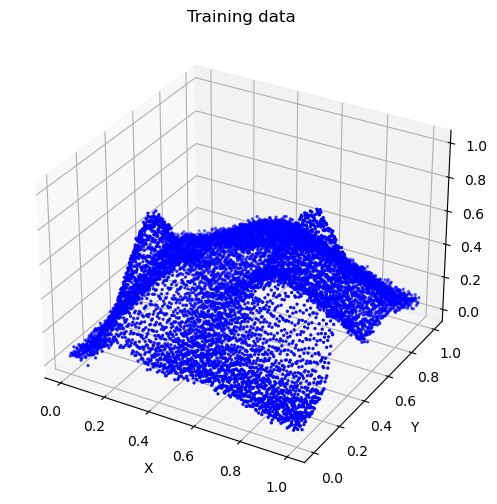

In [19]:
plt.close('all')
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.scatter3D(data['X'], data['Y'], data['Z'], s=2, marker='o', color='blue')
plt.title("Training data")
plt.xlabel("X")
plt.ylabel("Y")

In [20]:
training_data = data.sample(frac=0.8)
validation_data = data.drop(training_data.index)

# check len of data frames 
print(len(training_data))
print(len(validation_data))

9000
2250


In [5]:
# define model topology
inputs = tf.keras.layers.Input(shape=(2,))
x = tf.keras.layers.Dense(6, name='HiddenLayer', activation=tf.keras.activations.tanh)(inputs)
x = tf.keras.layers.Dense(6, name='HiddenLayer2', activation=tf.keras.activations.tanh)(x)
output = tf.keras.layers.Dense(1, name='OutputLayer', activation = tf.keras.activations.tanh)(x)

2022-12-22 11:20:24.004064: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-12-22 11:20:24.007000: I tensorflow/core/common_runtime/process_util.cc:146] Creating new thread pool with default inter op setting: 2. Tune using inter_op_parallelism_threads for best performance.


In [6]:
# create model
model = tf.keras.Model(inputs = inputs, outputs = output, name='TF_3d_regression_example')

Model: "TF_3d_regression_example"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 2)]               0         
                                                                 
 HiddenLayer (Dense)         (None, 6)                 18        
                                                                 
 HiddenLayer2 (Dense)        (None, 6)                 42        
                                                                 
 OutputLayer (Dense)         (None, 1)                 7         
                                                                 
Total params: 67
Trainable params: 67
Non-trainable params: 0
_________________________________________________________________


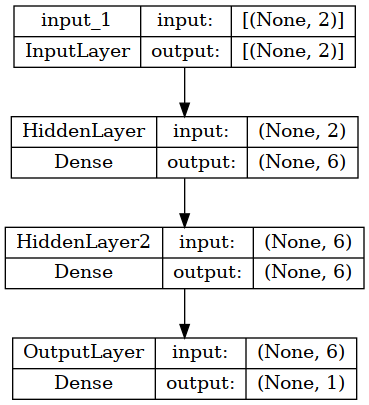

In [7]:
# inspect model
model.summary()
tf.keras.utils.plot_model(model, show_shapes=True)

In [8]:
learning_rate = 0.016

model.compile(loss = tf.keras.losses.MeanSquaredError(),
             optimizer = tf.keras.optimizers.Adam(learning_rate),
             metrics = [tf.keras.metrics.MeanAbsoluteError()])

In [9]:
history = model.fit(training_data[['X','Y']].to_numpy(), training_data['Z'].to_numpy(), batch_size=25, epochs=75, validation_data=(validation_data[['X','Y']].to_numpy(), validation_data['Z'].to_numpy()))

Epoch 1/75
360/360 [==============================] - 2s 4ms/step - loss: 0.0333 - mean_absolute_error: 0.1359 - val_loss: 0.0235 - val_mean_absolute_error: 0.1139
Epoch 2/75
360/360 [==============================] - 1s 4ms/step - loss: 0.0177 - mean_absolute_error: 0.0981 - val_loss: 0.0136 - val_mean_absolute_error: 0.0879
Epoch 3/75
360/360 [==============================] - 1s 4ms/step - loss: 0.0135 - mean_absolute_error: 0.0873 - val_loss: 0.0117 - val_mean_absolute_error: 0.0812
Epoch 4/75
360/360 [==============================] - 1s 4ms/step - loss: 0.0116 - mean_absolute_error: 0.0824 - val_loss: 0.0108 - val_mean_absolute_error: 0.0784
Epoch 5/75
360/360 [==============================] - 1s 3ms/step - loss: 0.0106 - mean_absolute_error: 0.0799 - val_loss: 0.0098 - val_mean_absolute_error: 0.0757
Epoch 6/75
360/360 [==============================] - 1s 4ms/step - loss: 0.0097 - mean_absolute_error: 0.0759 - val_loss: 0.0096 - val_mean_absolute_error: 0.0732
Epoch 7/75
360/3

<AxesSubplot: >

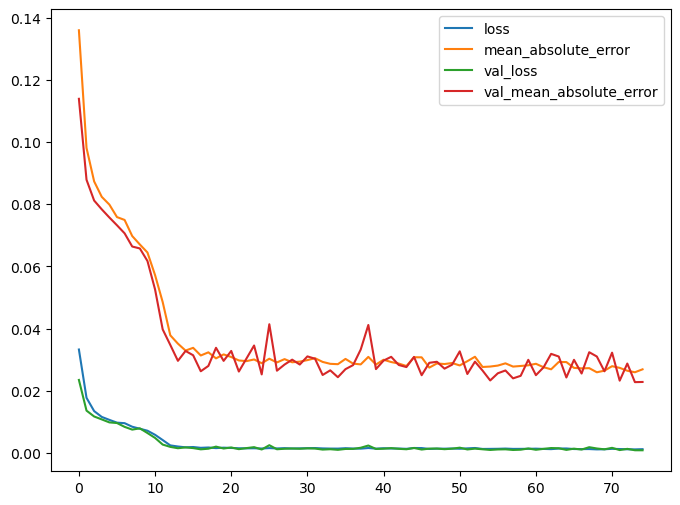

In [21]:
pd.DataFrame(history.history).plot()

In [22]:
test_data = []

div = 100

for x in range(div):
    for y in range(div):
        test_data.append([x/div, y/div])

In [23]:
test_data_df = pd.DataFrame(test_data, columns=['X','Y'])
test_pred = model.predict(test_data_df)

313/313 [==============================] - 1s 3ms/step


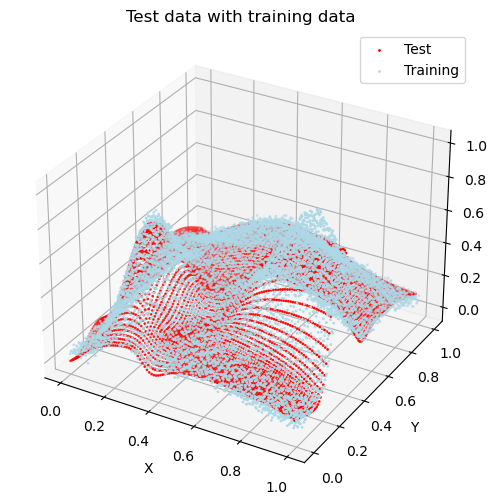

In [25]:
plt.close('all')
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.scatter3D(test_data_df['X'], test_data_df['Y'], test_pred, s=1, marker='o', color='red', label='Test')
ax.scatter3D(data['X'], data['Y'], data['Z'], s=1, marker='o', color='lightblue', label='Training')
plt.title("Test data with training data")
plt.xlabel("X")
plt.ylabel("Y")
plt.legend()

In [ ]:
fig.

In [ ]:
layers = model.layers


for layer in layers:
    weights =layer.get_weights()
    
    if len(weights) == 0:
        continue

    weights_w = weights[0]
    weights_b = weights[1]
    
    print(f'Weights of {layer.name}: ')
    print(weights_w)
    print(f'Bias of {layer.name}: ')
    print(weights_b)
    print('')